## Forecasting forest fires

This is a sample application to forecast forest fires.

## Load Data

In [1]:
import pandas
filename='dataset/forestfires.csv'
names = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC',
         'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
df= pandas.read_csv(filename,names=names)
print(pandas.isnull(df))


         X      Y  month    day   FFMC    DMC     DC    ISI   temp     RH  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
512  False  False  False  False  False  False  False  False  False  False   
513  False  False  False  False  False  False  False  False  False  False   
514  False  False  False  False  False  False  False  False  False  False   
515  False  False  False  False  False  False  False  False  False  False   
516  False  False  False  False  False  False  False  False  False  False   

      wind   rain   area  
0    False  False  False  
1    False  False  Fa

## Analyze and cleanse Data

Its a good practice to replace any fixed values for fields (Categorical data) For ex: month, day columns are categorical columns. We can replace the string values with an appropriate number (1-12 for month and 1-7 for day)

In [3]:
import numpy
import pandas

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

filename='dataset/forestfires.csv'
names = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC',
         'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
df= pandas.read_csv(filename,names=names)

print("**************Data Shape**************")
print(df.shape)
print("**************Data Types**************")
print(df.dtypes)


print("**************Inspecting the head of the data**************")
print(df.head(1))

df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

print("**************Inspecting the head of the data after replacement**************")
print(df.head(1))

print("**************Data Types Again**************")
print(df.dtypes)

print("**************Data Stats**************")
print(df.describe())

print("**************Correlation**************")
print(df.corr(method='pearson'))



**************Data Shape**************
(517, 13)
**************Data Types**************
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object
**************Inspecting the head of the data**************
   X  Y month  day  FFMC   DMC    DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2  94.3  5.1   8.2  51   6.7   0.0   0.0
**************Inspecting the head of the data after replacement**************
   X  Y  month  day  FFMC   DMC    DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2  94.3  5.1   8.2  51   6.7   0.0   0.0
**************Data Types Again**************
X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area    

## Visualize Data

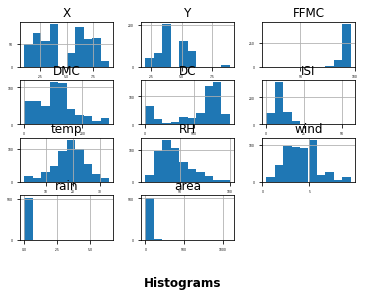

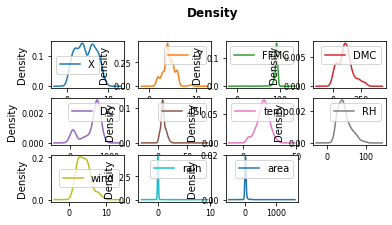

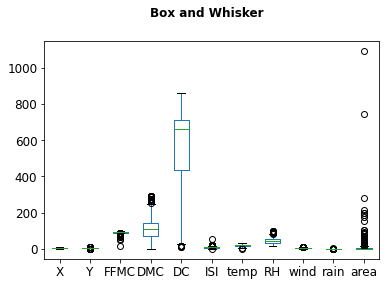

In [7]:
import numpy
import pandas
from matplotlib import pyplot as plt
from pandas.plotting._matplotlib import scatter_matrix

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

filename='dataset/forestfires.csv'
names = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC','DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
df= pandas.read_csv(filename,names=names)

# histograms
df.hist(sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.suptitle("Histograms",y=0.00,fontweight='bold')
plt.show()

# density
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False,fontsize=8)
plt.suptitle("Density",y=1.00,fontweight='bold')
plt.show()

# box and whisker plots
df.plot(kind='box', subplots=False, layout=(4,4), sharex=False, sharey=False,
fontsize=12)
plt.suptitle("Box and Whisker",y=1.00,fontweight='bold')
plt.show()

# scatter plot matrix
scatter_matrix(df)
plt.suptitle("Scatter Matrix",y=1.00,fontweight='bold')
plt.show()

# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.suptitle("Correlation Matrix",y=1.00,fontweight='bold')
plt.show()